__Mode choice model example__
<br>
Έρευνα που πραγματοποιήθηκε σε τυχαίο δείγμα του πληθυσμού διερευνά την επιλογή μέσου των μετακινούμενων για τις καθημερινές τους μετακινήσεις. Τα διαθέσιμα μέσα μετακίνησης είναι: Ιδιωτικό όχημα, Ταξί, ΜΜΜ, Υπηρεσία κατά παραγγελία οχήματος (Autonomous Moblity On Demand), και Υπηρεσία κατά παραγγελία διαμοιρασμένου οχήματος (βαν) και σύνδεση με ΜΜΜ. Για τη διερεύνηση των παραγόντων που επηρεάζουν την επιλογή μέσου μετακίνησης, αναπτύσσεται πολυωνυμικό πρότυπο Logit προκειμένου να υπολιγστεί η Χρησιμότητα του κάθε μέσου. Για το σκοπό αυτό το ερωτηματολόγιο περιελάμβανε 6 διαφορετικά σενάρια όπου το καθένα από τα εναλλακτικά μέσα (alternatives) αντιστοιχίζεται με συγκεκριμένο Χρόνο διαδρομής (TT), Κόστος (C) και Χρόνο περπατήματος (WT). Ένα ενδεικτικό σενάριο φαίνεται και στην παρακάτω εικόνα.

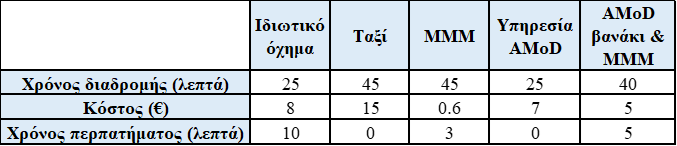

In [2]:
# Εισάγουμε τα απαραίτητα πακέτα
import pandas as pd #το βασικό πακε΄το διαχείρισης βάσεων δεδομένων
import matplotlib.pyplot as plt
from xlogit import MultinomialLogit #το πακέτο που υλοποιεί το μοντέλο
from xlogit.utils import wide_to_long #εντολή για τη μορφοποίηση της βάσης δεδομένων
import random
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Διαβάζουμε τη βάση δεδομένων από τη θέση του αρχείου στον υπολογιστή μας
data = pd.read_csv('dataset_modechoice_book.csv')

In [7]:
# Τυπώνουμε τις πρώτες γραμμές της βάσης δεδομένων για να ελέγξουμε ότι έχουν διαβαστεί σωστά τα δεδομένα
data.head()

,purpose,gender,age,income,household,children,edu,occupation,ncars,scenario,...,C3,WT3,TT4,C4,WT4,TT5,C5,WT5,choice_rainy,id_panel
0,4,2,2,3,2,2,5,6,1,1,...,0.6,3,25,7,0,40,5,5,5,1
1,4,1,3,1,2,0,3,3,3,1,...,0.6,3,25,7,0,40,5,5,5,2
2,3,2,3,1,1,2,3,4,0,1,...,0.6,3,25,7,0,40,5,5,5,3
3,3,2,6,3,1,1,4,6,3,1,...,0.6,3,25,7,0,40,5,5,2,4
4,5,1,6,3,2,2,3,5,2,1,...,0.6,3,25,7,0,40,5,5,5,5


In [8]:
# Ελέγχουμε την κατανομή των απαντήσεων για τη μεταβλητή που εξετάζουμε σε %
# (1 = Ιδιωτικό όχημα,  2 = Ταξί, 3 = ΜΜΜ, 4 = Κατά παραγγελία όχημα, 5 = Κατά παραγγελία διαμοιρασμένο βανάκι & σύνδεση με ΜΜΜ)
count = data['choice'].value_counts(normalize=True) * 100
print(count)

3    32.127193
1    24.658869
5    21.649610
4    13.365010
2     8.199318
Name: choice, dtype: float64


In [13]:
# Αλλάζουμε τον τύπο της βάσης δεδομένων από wide σε long format
data_long = wide_to_long(data, id_col='id_panel', alt_name='alt', sep='',
                  alt_list=['1', '2', '3', '4', '5'],
                  varying=['TT', 'C', 'WT'], alt_is_prefix=False)
data_long

,id_panel,alt,TT,C,WT,purpose,gender,age,income,household,children,edu,occupation,ncars,scenario,choice,choice_rainy
0,1,1,25,8.0,10,4,2,2,3,2,2,5,6,1,1,5,5
1,1,2,45,15.0,0,4,2,2,3,2,2,5,6,1,1,5,5
2,1,3,45,0.6,3,4,2,2,3,2,2,5,6,1,1,5,5
3,1,4,25,7.0,0,4,2,2,3,2,2,5,6,1,1,5,5
4,1,5,40,5.0,5,4,2,2,3,2,2,5,6,1,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41035,1368,1,25,5.0,5,1,2,3,3,1,0,4,2,1,6,1,1
41036,1368,2,30,15.0,0,1,2,3,3,1,0,4,2,1,6,1,1
41037,1368,3,55,1.4,3,1,2,3,3,1,0,4,2,1,6,1,1
41038,1368,4,30,12.0,0,1,2,3,3,1,0,4,2,1,6,1,1


In [14]:
#check the choice column for an example
print(data_long[data_long['id_panel']==10]['choice'])

45       5
46       5
47       5
48       5
49       5
6885     2
6886     2
6887     2
6888     2
6889     2
13725    3
13726    3
13727    3
13728    3
13729    3
20565    3
20566    3
20567    3
20568    3
20569    3
27405    4
27406    4
27407    4
27408    4
27409    4
34245    2
34246    2
34247    2
34248    2
34249    2
Name: choice, dtype: int64


In [15]:
# Μετατρέπουμε τη μεταβλητή που ορίζει την επιλογή στο σενάριο σε χαρακτη΄ρα (character)
data_long['choice']= data_long['choice'].astype(str)

In [16]:
random.seed(1)
sample = random.sample(range(1, 1368), 250)
sample

[276,
 1166,
 130,
 523,
 242,
 1015,
 921,
 968,
 1335,
 778,
 430,
 193,
 1000,
 59,
 799,
 887,
 1245,
 5,
 913,
 546,
 469,
 1211,
 210,
 651,
 63,
 46,
 53,
 1331,
 1109,
 19,
 781,
 444,
 865,
 60,
 1081,
 455,
 897,
 1016,
 1133,
 478,
 708,
 473,
 449,
 942,
 594,
 45,
 853,
 1140,
 1316,
 205,
 381,
 1289,
 608,
 248,
 682,
 1026,
 1040,
 389,
 622,
 582,
 1204,
 1023,
 1035,
 806,
 1207,
 71,
 984,
 498,
 828,
 849,
 1362,
 355,
 752,
 1124,
 768,
 178,
 899,
 1360,
 1042,
 222,
 336,
 1067,
 759,
 1003,
 61,
 962,
 90,
 632,
 1260,
 1215,
 1185,
 807,
 1326,
 349,
 346,
 1029,
 465,
 26,
 409,
 1106,
 1123,
 476,
 829,
 1053,
 705,
 1184,
 724,
 941,
 552,
 1351,
 1248,
 12,
 786,
 1050,
 265,
 1063,
 1150,
 421,
 873,
 115,
 986,
 747,
 1168,
 1136,
 410,
 1034,
 847,
 994,
 731,
 709,
 4,
 1103,
 1107,
 1277,
 1255,
 679,
 939,
 1229,
 58,
 471,
 1302,
 363,
 1128,
 1197,
 371,
 188,
 1129,
 67,
 145,
 171,
 35,
 928,
 30,
 576,
 512,
 551,
 225,
 1280,
 379,
 706,
 595,
 

In [17]:
# Χωρίζουμε τα δεδομένα σε train (υποσύνολο εκπαίδευσης) και test set (υποσύνολο αξιολόγησης)
data_long_train = data_long[data_long['id_panel'].isin(sample)]
data_long_test = data_long[-data_long['id_panel'].isin(sample)]

In [18]:
# Υπολογίζουμε το πρότυπο Multinomial Logit χρησιμοποιώντας alternative specific και individual specific variables (isvars)
# Παρατηρούμε ότι η πρώτη κατηγορία ("Ιδιωτικό όχημα") λειτουργεί ω΄ς το επίπεδο αναφοράς
varnames=['TT', 'C', 'WT', 'age', 'gender', 'income']
model = MultinomialLogit()
model.fit(X=data_long_train[varnames],
          y=data_long_train['choice'],
          varnames=varnames,
          alts=data_long_train['alt'],
          ids=data_long_train['id_panel'], isvars= ['age', 'gender', 'income'], fit_intercept=True) #isvars= ['AGE', 'INCOME', 'PTN_SATIS', 'CITYCENTER'],
model.summary()

Optimization terminated successfully.
    Message: The gradients are close to zero
    Iterations: 9
    Function evaluations: 10
Estimation time= 0.1 seconds
---------------------------------------------------------------------------
Coefficient              Estimate      Std.Err.         z-val         P>|z|
---------------------------------------------------------------------------
_intercept.2           -1.2707864     0.5263696    -2.4142473        0.0159 *  
_intercept.3            0.0728927     0.3374785     0.2159921         0.829    
_intercept.4           -0.1046221     0.3980740    -0.2628207         0.793    
_intercept.5           -0.9176940     0.3607876    -2.5435853        0.0111 *  
age.2                   0.1442701     0.0784372     1.8393076        0.0661 .  
age.3                   0.2424340     0.0485905     4.9893294      6.77e-07 ***
age.4                   0.0447394     0.0628785     0.7115218         0.477    
age.5                   0.2296126     0.0529393     4

In [19]:
print(data_long_test.shape)
y_test = data_long_test.iloc[::5]
y_test = y_test['choice']
print(y_test.shape)
y_pred = model.predict(X=data_long_test[varnames], varnames=varnames, alts=data_long_test['alt'],
          ids = data_long_test['id_panel'])
print(y_pred.shape)

(33540, 17)
(6708,)
(6708,)


In [20]:
confusion_matrix(y_test, y_pred)

array([[ 649,    0,  597,   83,  340],
       [ 135,    0,  254,   36,  151],
       [ 241,    0, 1482,  107,  290],
       [ 160,    0,  482,  125,  137],
       [ 171,    0,  500,   26,  742]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.39      0.43      1669
           2       0.00      0.00      0.00       576
           3       0.45      0.70      0.55      2120
           4       0.33      0.14      0.20       904
           5       0.45      0.52      0.48      1439

    accuracy                           0.45      6708
   macro avg       0.34      0.35      0.33      6708
weighted avg       0.40      0.45      0.41      6708



C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
